<a href="https://colab.research.google.com/github/marklouisALTER/Face_Recognition-GoogleColab-/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

def connect_dots(image, landmarks, dot_indices, color):
    for i in range(len(dot_indices) - 1):
        start_point = (landmarks.part(dot_indices[i]).x, landmarks.part(dot_indices[i]).y)
        end_point = (landmarks.part(dot_indices[i + 1]).x, landmarks.part(dot_indices[i + 1]).y)
        cv2.line(image, start_point, end_point, color, 1)

def detect_faces_and_landmarks(image_path, persons_folder):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use the pre-trained face detector from dlib
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Draw bounding box around the face
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Draw small dots for facial landmarks (eyebrows, nose, eyes, mouth)
        for i in range(68):
            x, y = landmarks.part(i).x, landmarks.part(i).y
            cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

        # Connect dots with lines
        connect_dots(image, landmarks, [17, 18, 19, 20, 21], (0, 255, 0))  # Connect left eyebrow
        connect_dots(image, landmarks, [22, 23, 24, 25, 26], (0, 255, 0))  # Connect right eyebrow
        connect_dots(image, landmarks, list(range(36, 42)), (0, 0, 255))  # Connect left eye
        connect_dots(image, landmarks, list(range(42, 48)), (0, 0, 255))  # Connect right eye
        connect_dots(image, landmarks, list(range(29, 36)), (255, 0, 0))  # Connect nose
        connect_dots(image, landmarks, list(range(48, 68)), (0, 255, 255))  # Connect mouth

        # Compare with images in the folder
        similarity_scores, matching_name = compare_with_folder(image[y:y+h, x:x+w], persons_folder)

        # Display the match result and accuracy for each feature
        display_results(image, x, y, similarity_scores, matching_name)

    cv2_imshow(image)  # Display the image

# Upload an image file in Google Colab
from google.colab import files

uploaded = files.upload()

# Use the first uploaded image (assuming there is at least one)
image_path = list(uploaded.keys())[0]

# Detect faces and landmarks and display the result
detect_faces_and_landmarks(image_path, persons_folder)


Saving Cherry ann.png to Cherry ann (4).png


NameError: ignored

In [14]:
!pip install dlib
!pip install flask


In [15]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


--2023-12-16 05:44:42--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  81.4MB/s    in 0.7s    

2023-12-16 05:44:43 (81.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [28]:
!git clone https://github.com/virajdas/ColabFaceRecognition-OpenCV/


Cloning into 'ColabFaceRecognition-OpenCV'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 57 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (57/57), 252.18 KiB | 1.53 MiB/s, done.
Resolving deltas: 100% (15/15), done.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=f2a09110f1c75c18e77be1c7557516b16d4e1dbf081557ee32abaf426ade1ac5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Saving Cherry ann.png to Cherry ann (7).png
Cherry ann (Overall: 74.42%)
Nose: 96.14%
Left Eye: 95.52%
Right Eye: 95.53%
Left Eyebrow: 97.00%
Right Eyebrow: 93.48%
Mouth: 88.67%


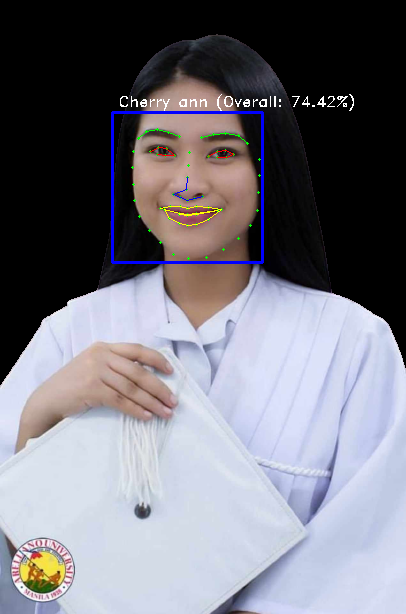

In [50]:
import cv2
import dlib
import face_recognition
import numpy as np
from google.colab import files
import os

# Load the facial landmarks model
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to load all known face encodings and their corresponding names from the known_img folder
def load_known_faces(known_folder):
    known_faces = []
    known_names = []

    for file_name in os.listdir(known_folder):
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            image_path = os.path.join(known_folder, file_name)
            img = face_recognition.load_image_file(image_path)
            encoding = face_recognition.face_encodings(img)[0]
            known_faces.append(encoding)
            known_names.append(os.path.splitext(file_name)[0])  # Use the file name (without extension) as the person's name

    return known_faces, known_names

# Function to connect dots with lines on the image
def connect_dots(image, landmarks, dot_indices, color):
    for i in range(len(dot_indices) - 1):
        start_point = (landmarks.part(dot_indices[i]).x, landmarks.part(dot_indices[i]).y)
        end_point = (landmarks.part(dot_indices[i + 1]).x, landmarks.part(dot_indices[i + 1]).y)
        cv2.line(image, start_point, end_point, color, 1)

# Function to recognize faces in the image using known faces
def recognize_faces(known_faces, known_names, image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use the pre-trained face detector from dlib
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Draw bounding box around the face
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the face encoding for recognition
        unknown_encoding = face_recognition.face_encodings(image, [(y, x + w, y + h, x)])[0]

        # Compare with known faces
        results = face_recognition.compare_faces(known_faces, unknown_encoding)

        for i, result in enumerate(results):
            if result:
                name = known_names[i]

                # Calculate the percentage of accuracy
                face_distances = face_recognition.face_distance(known_faces, unknown_encoding)
                overall_accuracy = (1 - face_distances[i]) * 100

                print(f"{name} (Overall: {overall_accuracy:.2f}%)")

                # Display accuracy for individual facial features
                feature_accuracies = []

                # Nose accuracy
                nose_landmarks = list(range(29, 36))
                nose_distances = face_recognition.face_distance([known_faces[i][nose_landmarks]], unknown_encoding[nose_landmarks])
                feature_accuracies.append((1 - nose_distances[0]) * 100)

                # Left eye accuracy
                left_eye_landmarks = list(range(36, 42))
                left_eye_distances = face_recognition.face_distance([known_faces[i][left_eye_landmarks]], unknown_encoding[left_eye_landmarks])
                feature_accuracies.append((1 - left_eye_distances[0]) * 100)

                # Right eye accuracy
                right_eye_landmarks = list(range(42, 48))
                right_eye_distances = face_recognition.face_distance([known_faces[i][right_eye_landmarks]], unknown_encoding[right_eye_landmarks])
                feature_accuracies.append((1 - right_eye_distances[0]) * 100)

                # Left eyebrow accuracy
                left_eyebrow_landmarks = [17, 18, 19, 20, 21]
                left_eyebrow_distances = face_recognition.face_distance([known_faces[i][left_eyebrow_landmarks]], unknown_encoding[left_eyebrow_landmarks])
                feature_accuracies.append((1 - left_eyebrow_distances[0]) * 100)

                # Right eyebrow accuracy
                right_eyebrow_landmarks = [22, 23, 24, 25, 26]
                right_eyebrow_distances = face_recognition.face_distance([known_faces[i][right_eyebrow_landmarks]], unknown_encoding[right_eyebrow_landmarks])
                feature_accuracies.append((1 - right_eyebrow_distances[0]) * 100)

                # Mouth accuracy
                mouth_landmarks = list(range(48, 68))
                mouth_distances = face_recognition.face_distance([known_faces[i][mouth_landmarks]], unknown_encoding[mouth_landmarks])
                feature_accuracies.append((1 - mouth_distances[0]) * 100)

                # Print accuracy for each feature
                for feature_name, feature_accuracy in zip(['Nose', 'Left Eye', 'Right Eye', 'Left Eyebrow', 'Right Eyebrow', 'Mouth'], feature_accuracies):
                    print(f"{feature_name}: {feature_accuracy:.2f}%")

                # Draw the name and overall accuracy on the image
                font = cv2.FONT_HERSHEY_DUPLEX
                cv2.putText(image, f"{name} (Overall: {overall_accuracy:.2f}%)", (x + 6, y - 6), font, 0.5, (255, 255, 255), 1)

                # Draw small dots for facial landmarks
                for i in range(68):
                    x, y = landmarks.part(i).x, landmarks.part(i).y
                    cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

                # Connect dots with lines
                connect_dots(image, landmarks, [17, 18, 19, 20, 21], (0, 255, 0))  # Connect left eyebrow
                connect_dots(image, landmarks, [22, 23, 24, 25, 26], (0, 255, 0))  # Connect right eyebrow
                connect_dots(image, landmarks, list(range(36, 42)), (0, 0, 255))  # Connect left eye
                connect_dots(image, landmarks, list(range(42, 48)), (0, 0, 255))  # Connect right eye
                connect_dots(image, landmarks, list(range(29, 36)), (255, 0, 0))  # Connect nose
                connect_dots(image, landmarks, list(range(48, 68)), (0, 255, 255))  # Connect mouth

    cv2_imshow(image)  # Display the image

# Upload an image file in Google Colab
uploaded = files.upload()

# Use the first uploaded image (assuming there is at least one)
image_path = list(uploaded.keys())[0]

# Load known faces
known_folder_path = "known_img"
known_faces, known_names = load_known_faces(known_folder_path)

# Recognize faces, landmarks, and draw labels
recognize_faces(known_faces, known_names, image_path)


In [2]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=955a93ff300babc0b4f63f94ae32212233ded75100db946ac50b008458fb9fd4
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Saving tbl_empdata-face_image.png to tbl_empdata-face_image (4).png
Cherry ann (Overall: 80.36%)
Nose: 96.26%
Left Eye: 96.79%
Right Eye: 97.70%
Left Eyebrow: 97.59%
Right Eyebrow: 94.49%
Mouth: 91.59%


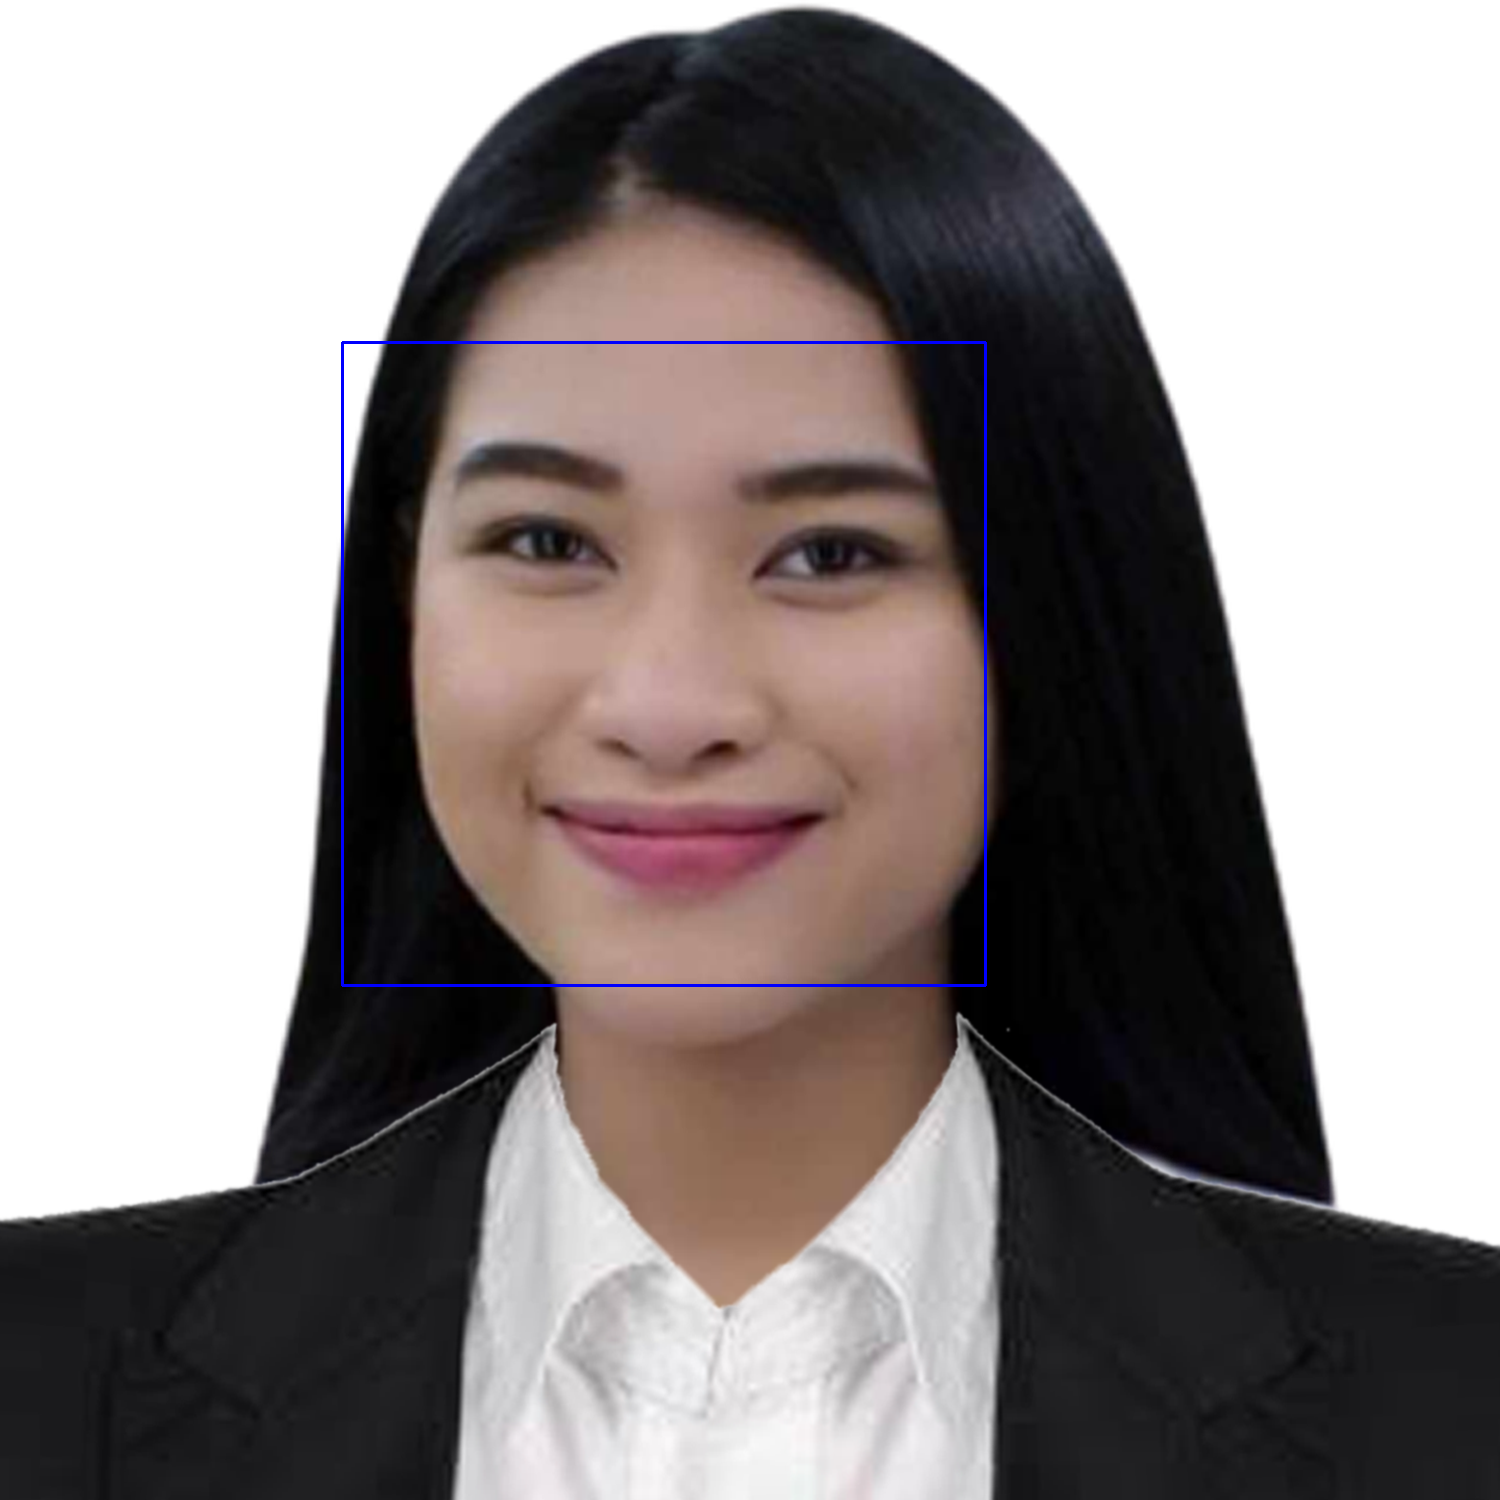

In [49]:
import cv2
import dlib
import face_recognition
import numpy as np
from google.colab import files
import os

# Load the facial landmarks model
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to load all known face encodings and their corresponding names from the known_img folder
def load_known_faces(known_folder):
    known_faces = []
    known_names = []

    for file_name in os.listdir(known_folder):
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            image_path = os.path.join(known_folder, file_name)
            img = face_recognition.load_image_file(image_path)
            encoding = face_recognition.face_encodings(img)[0]
            known_faces.append(encoding)
            known_names.append(os.path.splitext(file_name)[0])  # Use the file name (without extension) as the person's name

    return known_faces, known_names

# Function to recognize faces in the image using known faces
def recognize_faces(known_faces, known_names, image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use the pre-trained face detector from dlib
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Draw bounding box around the face
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the face encoding for recognition
        unknown_encoding = face_recognition.face_encodings(image, [(y, x + w, y + h, x)])[0]

        # Compare with known faces
        results = face_recognition.compare_faces(known_faces, unknown_encoding)

        for i, result in enumerate(results):
            if result:
                name = known_names[i]
                face_distances = face_recognition.face_distance(known_faces, unknown_encoding)
                overall_accuracy = (1 - face_distances[i]) * 100

                print(f"{name} (Overall: {overall_accuracy:.2f}%)")

                # Display accuracy for individual facial features
                feature_accuracies = []

                # Nose accuracy
                nose_landmarks = list(range(29, 36))
                nose_distances = face_recognition.face_distance([known_faces[i][nose_landmarks]], unknown_encoding[nose_landmarks])
                feature_accuracies.append((1 - nose_distances[0]) * 100)

                # Left eye accuracy
                left_eye_landmarks = list(range(36, 42))
                left_eye_distances = face_recognition.face_distance([known_faces[i][left_eye_landmarks]], unknown_encoding[left_eye_landmarks])
                feature_accuracies.append((1 - left_eye_distances[0]) * 100)

                # Right eye accuracy
                right_eye_landmarks = list(range(42, 48))
                right_eye_distances = face_recognition.face_distance([known_faces[i][right_eye_landmarks]], unknown_encoding[right_eye_landmarks])
                feature_accuracies.append((1 - right_eye_distances[0]) * 100)

                # Left eyebrow accuracy
                left_eyebrow_landmarks = [17, 18, 19, 20, 21]
                left_eyebrow_distances = face_recognition.face_distance([known_faces[i][left_eyebrow_landmarks]], unknown_encoding[left_eyebrow_landmarks])
                feature_accuracies.append((1 - left_eyebrow_distances[0]) * 100)

                # Right eyebrow accuracy
                right_eyebrow_landmarks = [22, 23, 24, 25, 26]
                right_eyebrow_distances = face_recognition.face_distance([known_faces[i][right_eyebrow_landmarks]], unknown_encoding[right_eyebrow_landmarks])
                feature_accuracies.append((1 - right_eyebrow_distances[0]) * 100)

                # Mouth accuracy
                mouth_landmarks = list(range(48, 68))
                mouth_distances = face_recognition.face_distance([known_faces[i][mouth_landmarks]], unknown_encoding[mouth_landmarks])
                feature_accuracies.append((1 - mouth_distances[0]) * 100)

                # Print accuracy for each feature
                for feature_name, feature_accuracy in zip(['Nose', 'Left Eye', 'Right Eye', 'Left Eyebrow', 'Right Eyebrow', 'Mouth'], feature_accuracies):
                    print(f"{feature_name}: {feature_accuracy:.2f}%")

    cv2_imshow(image)  # Display the image

# Upload an image file in Google Colab
uploaded = files.upload()

# Use the first uploaded image (assuming there is at least one)
image_path = list(uploaded.keys())[0]

# Load known faces
known_folder_path = "known_img"
known_faces, known_names = load_known_faces(known_folder_path)

# Recognize faces, landmarks, and draw labels
recognize_faces(known_faces, known_names, image_path)
